In [15]:
help(pd.read_csv)

Help on function read_csv in module pandas.io.parsers.readers:

read_csv(filepath_or_buffer: 'FilePath | ReadCsvBuffer[bytes] | ReadCsvBuffer[str]', *, sep: 'str | None | lib.NoDefault' = <no_default>, delimiter: 'str | None | lib.NoDefault' = None, header: "int | Sequence[int] | None | Literal['infer']" = 'infer', names: 'Sequence[Hashable] | None | lib.NoDefault' = <no_default>, index_col: 'IndexLabel | Literal[False] | None' = None, usecols: 'UsecolsArgType' = None, dtype: 'DtypeArg | None' = None, engine: 'CSVEngine | None' = None, converters: 'Mapping[Hashable, Callable] | None' = None, true_values: 'list | None' = None, false_values: 'list | None' = None, skipinitialspace: 'bool' = False, skiprows: 'list[int] | int | Callable[[Hashable], bool] | None' = None, skipfooter: 'int' = 0, nrows: 'int | None' = None, na_values: 'Hashable | Iterable[Hashable] | Mapping[Hashable, Iterable[Hashable]] | None' = None, keep_default_na: 'bool' = True, na_filter: 'bool' = True, verbose: 'bool | 

In [49]:
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats

eth_df=pd.read_csv('ethereum_daily_data_2018_2024.csv', parse_dates=['time'])
eth_df

,time,Open,High,Low,Close,Volume
0,2018-01-01,741.69,766.49,718.90,757.22,910875.63
1,2018-01-02,756.17,882.61,756.17,861.97,1123318.86
2,2018-01-03,861.97,951.70,847.90,941.10,871172.13
3,2018-01-04,941.00,997.44,901.03,944.83,822844.78
4,2018-01-05,944.50,1165.81,926.75,963.88,1682729.53
...,...,...,...,...,...,...
2457,2024-09-22,2613.27,2632.42,2525.50,2581.43,433318.91
2458,2024-09-23,2581.43,2703.72,2540.14,2647.17,797788.43
2459,2024-09-24,2647.17,2671.47,2591.67,2653.41,564932.40
2460,2024-09-25,2653.41,2673.98,2554.44,2579.69,458195.34


In [51]:
eth_df.isna().sum()

time      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [53]:
eth_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2462 entries, 0 to 2461
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   time    2462 non-null   datetime64[ns]
 1   Open    2462 non-null   float64       
 2   High    2462 non-null   float64       
 3   Low     2462 non-null   float64       
 4   Close   2462 non-null   float64       
 5   Volume  2462 non-null   float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 115.5 KB


In [55]:
eth_df.describe()

,time,Open,High,Low,Close,Volume
count,2462,2462.000000,2462.000000,2462.000000,2462.000000,2.462000e+03
mean,2021-05-14 16:29:38.066612480,1448.708091,1489.955333,1402.848956,1449.479630,1.003126e+06
min,2018-01-01 00:00:00,84.120000,84.530000,82.080000,84.120000,2.981167e+04
25%,2019-09-07 06:00:00,245.810000,249.962500,240.180000,245.952500,2.997650e+05
50%,2021-05-14 12:00:00,1319.290000,1353.285000,1271.875000,1320.270000,5.245694e+05
75%,2023-01-19 18:00:00,2293.322500,2345.830000,2203.000000,2295.117500,1.300469e+06
max,2024-09-26 00:00:00,4810.970000,4865.940000,4710.000000,4810.970000,1.098033e+07
std,NaN,1210.746095,1244.307899,1172.106667,1210.897342,1.114440e+06


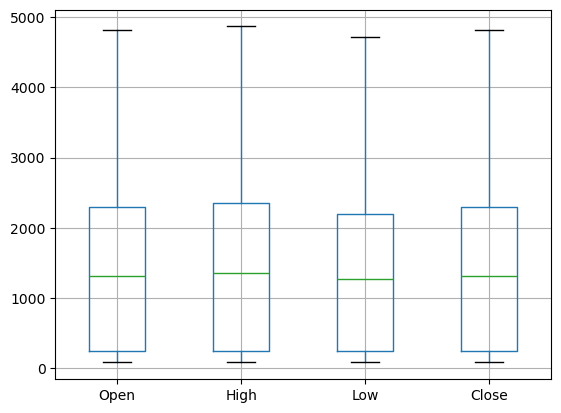

In [57]:
eth_df.boxplot(column=['Open', 'High', 'Low', 'Close'])
plt.show()

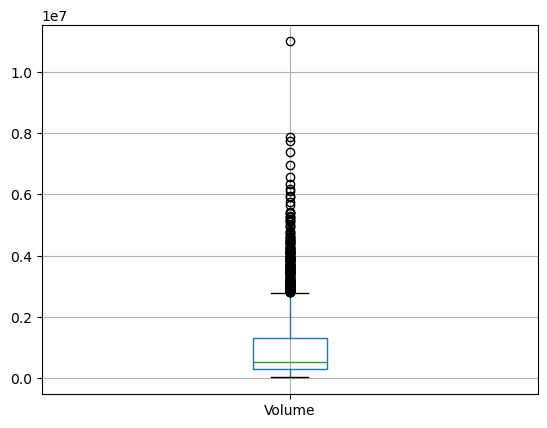

In [59]:
eth_df.boxplot(column='Volume')
plt.show()

In [61]:
for column in eth_df:
    print(column)

eth_df_norm = eth_df
eth_df_norm

for column in eth_df_norm:    
    if eth_df_norm[column].dtype != '<M8[ns]':
        eth_df_norm[f'{column} z-scores'] = stats.zscore(eth_df_norm[column])

time
Open
High
Low
Close
Volume


In [63]:
eth_df_norm

,time,Open,High,Low,Close,Volume,Open z-scores,High z-scores,Low z-scores,Close z-scores,Volume z-scores
0,2018-01-01,741.69,766.49,718.90,757.22,910875.63,-0.584071,-0.581538,-0.583640,-0.571808,-0.082794
1,2018-01-02,756.17,882.61,756.17,861.97,1123318.86,-0.572109,-0.488198,-0.551836,-0.485284,0.107873
2,2018-01-03,861.97,951.70,847.90,941.10,871172.13,-0.484707,-0.432662,-0.473559,-0.419922,-0.118427
3,2018-01-04,941.00,997.44,901.03,944.83,822844.78,-0.419420,-0.395895,-0.428221,-0.416841,-0.161801
4,2018-01-05,944.50,1165.81,926.75,963.88,1682729.53,-0.416529,-0.260555,-0.406273,-0.401106,0.609941
...,...,...,...,...,...,...,...,...,...,...,...
2457,2024-09-22,2613.27,2632.42,2525.50,2581.43,433318.91,0.962050,0.918339,0.958001,0.934993,-0.511398
2458,2024-09-23,2581.43,2703.72,2540.14,2647.17,797788.43,0.935747,0.975652,0.970494,0.989294,-0.184289
2459,2024-09-24,2647.17,2671.47,2591.67,2653.41,564932.40,0.990055,0.949729,1.014466,0.994448,-0.393276
2460,2024-09-25,2653.41,2673.98,2554.44,2579.69,458195.34,0.995210,0.951746,0.982696,0.933556,-0.489072


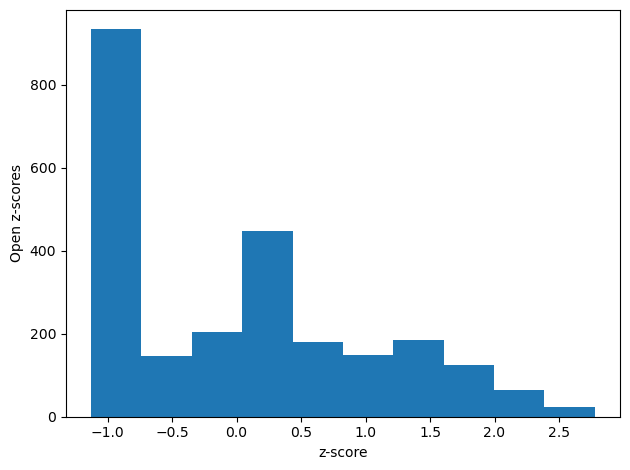

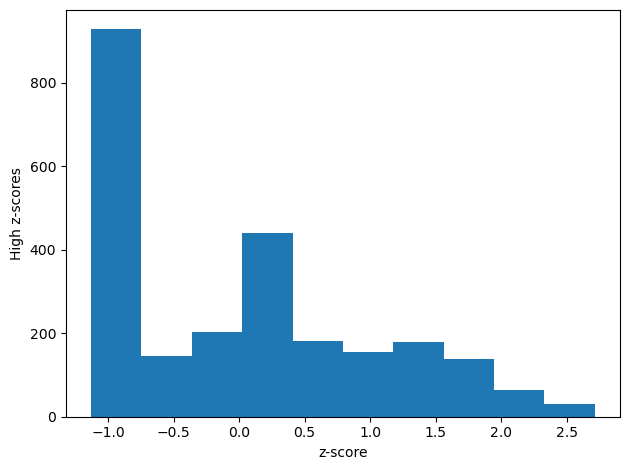

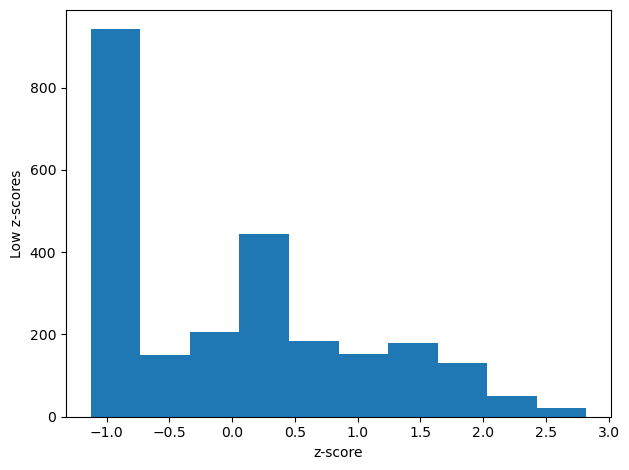

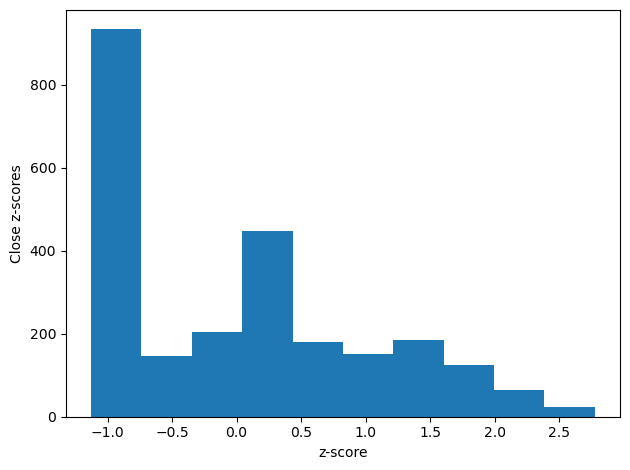

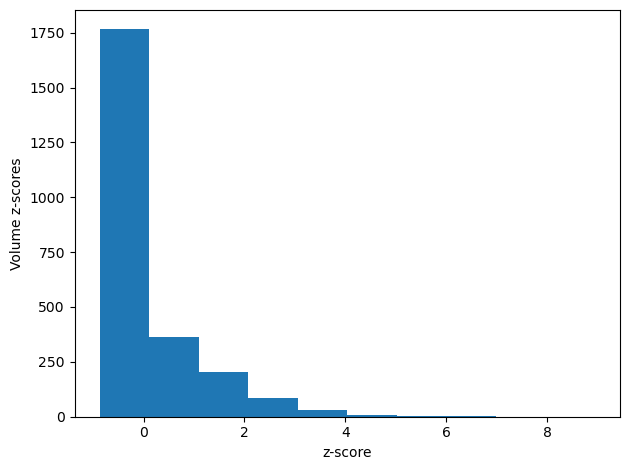

In [65]:
for column in eth_df_norm:
    if eth_df_norm[column].dtype != '<M8[ns]' and 'z-scores' in column:
        plt.hist(eth_df_norm[column], bins=10)
        plt.xlabel('z-score')
        plt.ylabel(column)
        plt.tight_layout()
        plt.show()

In [67]:
from scipy.stats import skew
from sklearn.preprocessing import QuantileTransformer

quantile_transformer = QuantileTransformer(output_distribution='normal', random_state=0)
for column in eth_df_norm:
    if eth_df_norm[column].dtype != '<M8[ns]':
        eth_df_norm[f'Quantile {column}'] = quantile_transformer.fit_transform(eth_df_norm[column].values.reshape(-1, 1)).flatten()
        print(f"Skewness after Quantile Transformation: {eth_df_norm[f'Quantile {column}'].skew():.5f}")

Skewness after Quantile Transformation: -0.00795
Skewness after Quantile Transformation: -0.00380
Skewness after Quantile Transformation: -0.00152
Skewness after Quantile Transformation: -0.00797
Skewness after Quantile Transformation: -0.00242
Skewness after Quantile Transformation: -0.00795
Skewness after Quantile Transformation: -0.00380
Skewness after Quantile Transformation: -0.00152
Skewness after Quantile Transformation: -0.00797
Skewness after Quantile Transformation: -0.00242


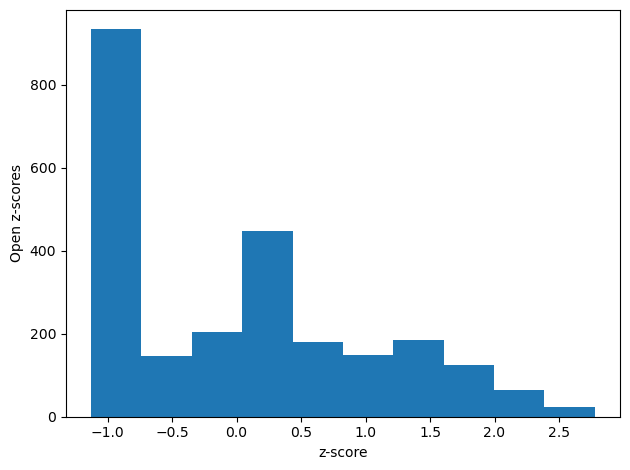

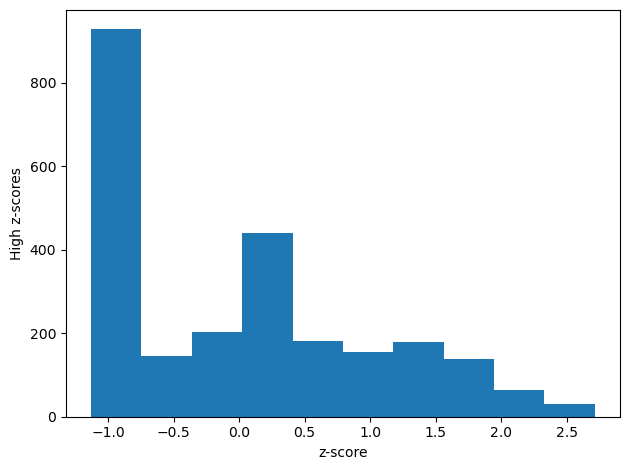

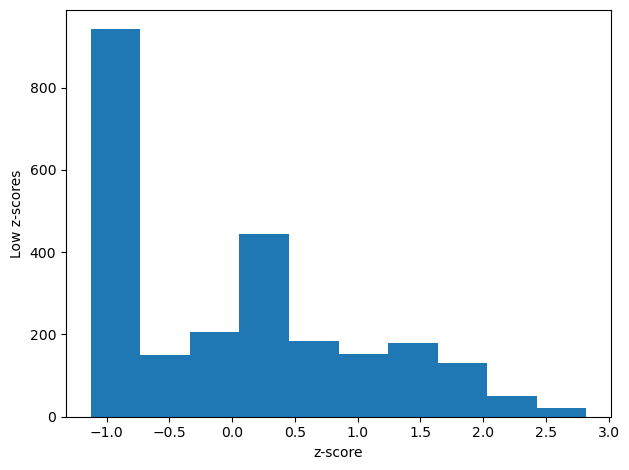

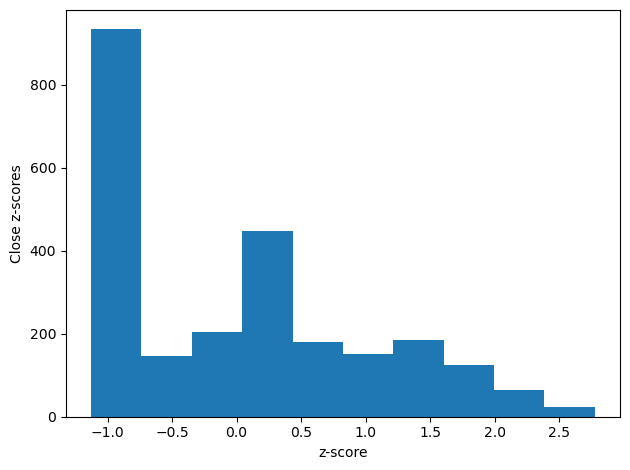

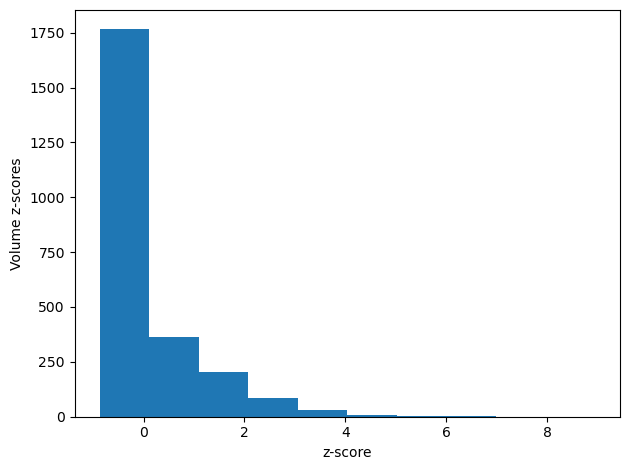

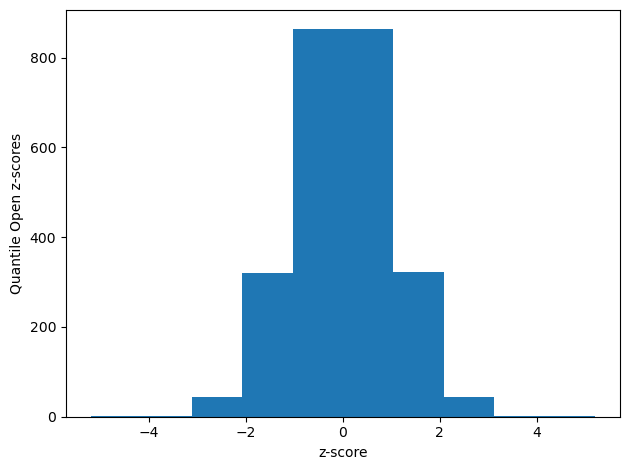

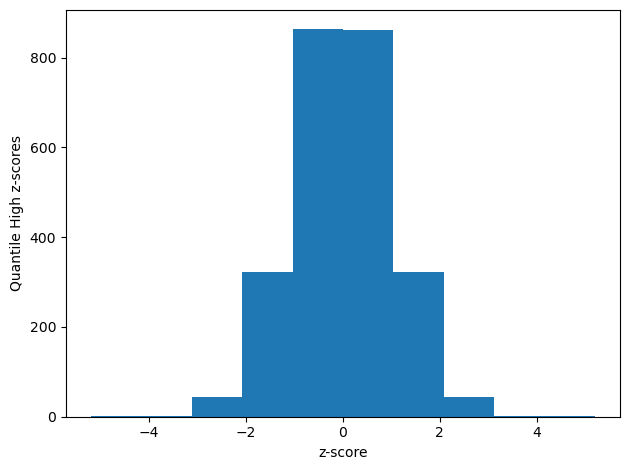

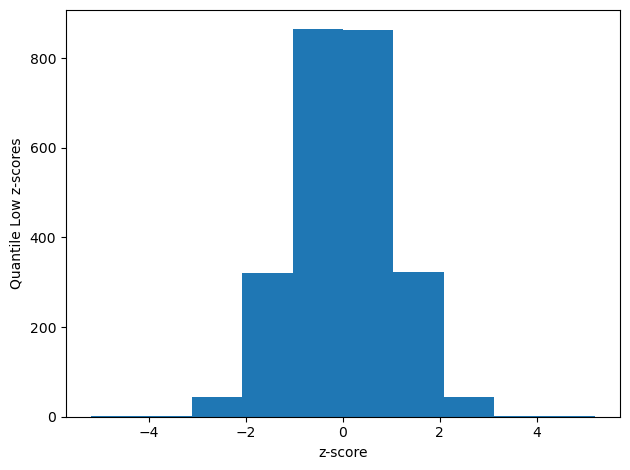

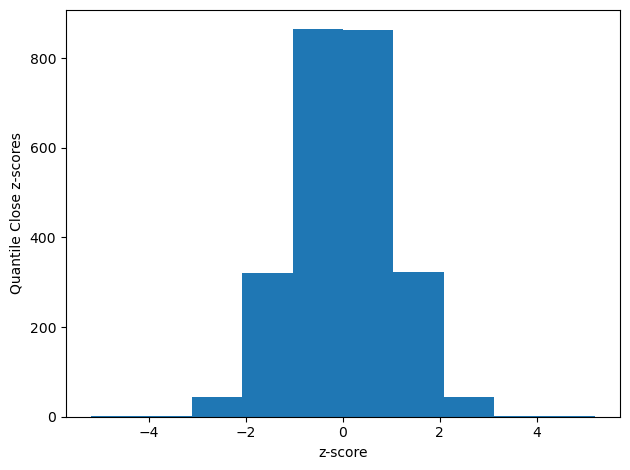

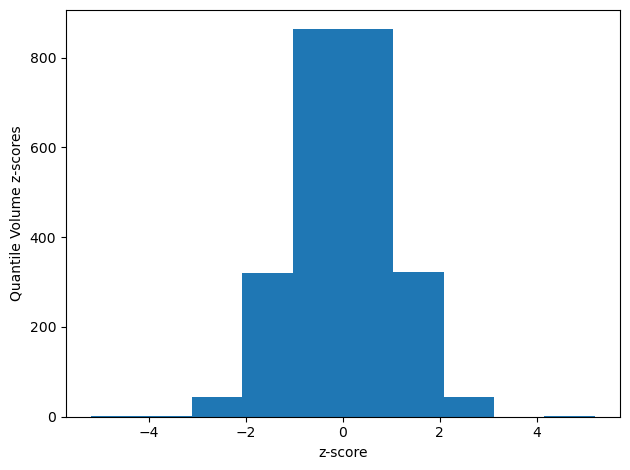

In [69]:
for column in eth_df_norm:
    if eth_df_norm[column].dtype != '<M8[ns]' and 'z-scores' in column:
        plt.hist(eth_df_norm[column], bins=10)
        plt.xlabel('z-score')
        plt.ylabel(column)
        plt.tight_layout()
        plt.show()

In [71]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

eth_df['lag_1'] = eth_df['Close'].shift(1)  # Lag feature (previous day's close)
eth_df['rolling_mean_7'] = eth_df['Close'].rolling(window=7).mean()  # 7-day moving average
eth_df['day_of_week'] = eth_df['time'].dt.dayofweek  # Day of the week

eth_df.head()

,time,Open,High,Low,Close,Volume,Open z-scores,High z-scores,Low z-scores,Close z-scores,...,Quantile Close,Quantile Volume,Quantile Open z-scores,Quantile High z-scores,Quantile Low z-scores,Quantile Close z-scores,Quantile Volume z-scores,lag_1,rolling_mean_7,day_of_week
0,2018-01-01,741.69,766.49,718.90,757.22,910875.63,-0.584071,-0.581538,-0.583640,-0.571808,...,-0.205413,0.442334,-0.210846,-0.211252,-0.205832,-0.205413,0.442334,NaN,NaN,0
1,2018-01-02,756.17,882.61,756.17,861.97,1123318.86,-0.572109,-0.488198,-0.551836,-0.485284,...,-0.181507,0.572471,-0.204601,-0.182924,-0.197576,-0.181507,0.572471,757.22,NaN,1
2,2018-01-03,861.97,951.70,847.90,941.10,871172.13,-0.484707,-0.432662,-0.473559,-0.419922,...,-0.167595,0.415151,-0.180790,-0.172488,-0.174748,-0.167595,0.415151,861.97,NaN,2
3,2018-01-04,941.00,997.44,901.03,944.83,822844.78,-0.419420,-0.395895,-0.428221,-0.416841,...,-0.167203,0.387400,-0.167070,-0.165371,-0.163399,-0.167203,0.387400,941.10,NaN,3
4,2018-01-05,944.50,1165.81,926.75,963.88,1682729.53,-0.416529,-0.260555,-0.406273,-0.401106,...,-0.165201,0.827716,-0.165968,-0.127115,-0.155964,-0.165201,0.827716,944.83,NaN,4


In [73]:
eth_df = eth_df.dropna()  # Drop rows with NaN values
eth_df.head()

,time,Open,High,Low,Close,Volume,Open z-scores,High z-scores,Low z-scores,Close z-scores,...,Quantile Close,Quantile Volume,Quantile Open z-scores,Quantile High z-scores,Quantile Low z-scores,Quantile Close z-scores,Quantile Volume z-scores,lag_1,rolling_mean_7,day_of_week
6,2018-01-07,1006.41,1117.84,1003.21,1117.75,563476.81,-0.365385,-0.299115,-0.341027,-0.274009,...,-0.126397,0.074082,-0.157103,-0.144741,-0.142445,-0.126397,0.074082,1008.36,942.158571,6
7,2018-01-08,1117.75,1228.25,967.84,1136.11,1137114.56,-0.273406,-0.210365,-0.371210,-0.258844,...,-0.119754,0.581793,-0.125521,-0.094438,-0.148667,-0.119754,0.581793,1117.75,996.285714,0
8,2018-01-09,1136.11,1300.30,1133.70,1289.24,812642.22,-0.258239,-0.152449,-0.229675,-0.132358,...,-0.018837,0.382938,-0.118443,-0.036908,-0.098905,-0.018837,0.382938,1136.11,1057.324286,1
9,2018-01-10,1289.24,1385.22,1210.85,1248.99,1105070.29,-0.131737,-0.084189,-0.163840,-0.165605,...,-0.049192,0.561662,-0.018383,0.016523,-0.046153,-0.049192,0.561662,1289.24,1101.308571,2
10,2018-01-11,1248.96,1333.92,1100.85,1139.32,1056985.76,-0.165013,-0.125425,-0.257707,-0.256192,...,-0.117727,0.535149,-0.048125,-0.018765,-0.104789,-0.117727,0.535149,1248.99,1129.092857,3


In [75]:
# Define features and target variable
X = eth_df[['lag_1', 'rolling_mean_7', 'day_of_week']]
y = eth_df['Close']

# Split data into train and test sets (80% train, 20% test)
split_index = int(len(X) * 0.8)
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

In [77]:
# Initialize the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model on the training set
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [79]:
# Predict on the test set
y_pred = rf_model.predict(X_test)

In [81]:
import numpy as np

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

# Display metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R² Score: {r2}")

Mean Absolute Error (MAE): 71.58590365853644
Root Mean Squared Error (RMSE): 105.85742409583501
R² Score: 0.9776626399340801


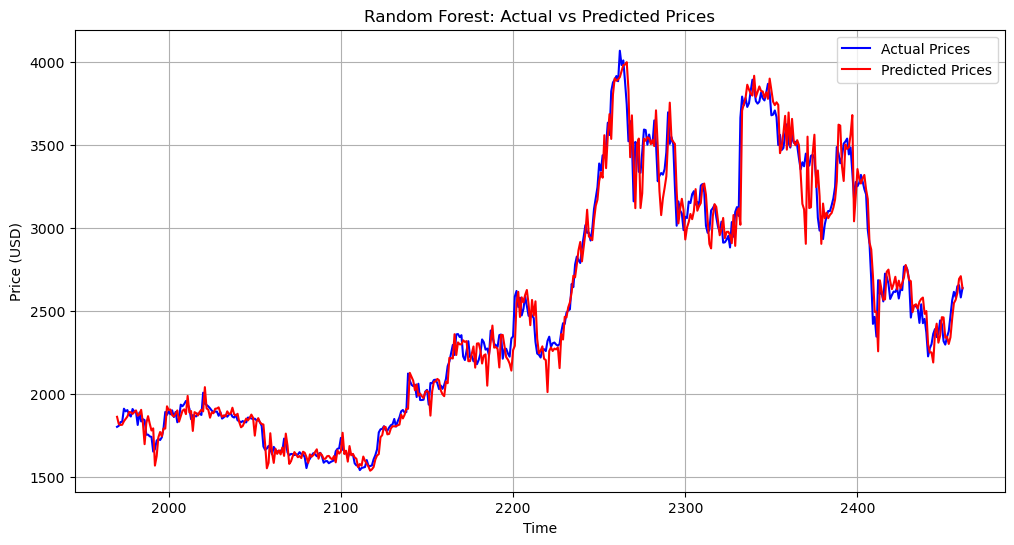

In [83]:
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test, label="Actual Prices", color="blue")
plt.plot(y_test.index, y_pred, label="Predicted Prices", color="red")
plt.title("Random Forest: Actual vs Predicted Prices")
plt.xlabel("Time")
plt.ylabel("Price (USD)")
plt.legend()
plt.grid()
plt.show()

In [85]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

# Scale features for better regression performance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

LinearRegression()

In [87]:
# Predict on the test set
y_pred = lr_model.predict(X_test_scaled)

In [89]:
# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

# Display the results
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R² Score: {r2}")

Mean Absolute Error (MAE): 51.48304338308221
Root Mean Squared Error (RMSE): 80.59483563551221
R² Score: 0.9870519720224893


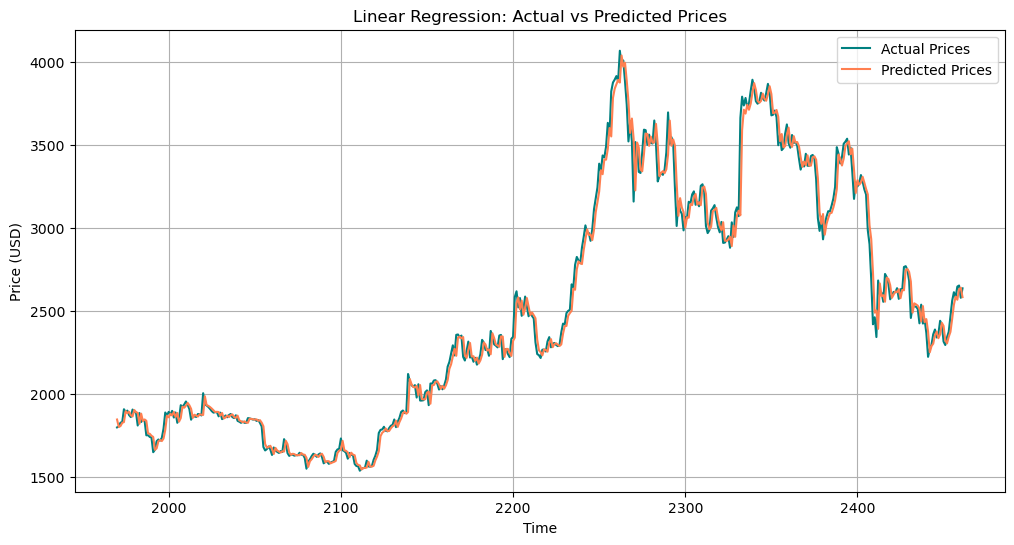

In [97]:
# Plot actual vs predicted prices
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test, label="Actual Prices", color="teal")
plt.plot(y_test.index, y_pred, label="Predicted Prices", color="coral")
plt.title("Linear Regression: Actual vs Predicted Prices")
plt.xlabel("Time")
plt.ylabel("Price (USD)")
plt.legend()
plt.grid()
plt.show()

          Feature  Coefficient
0           lag_1   968.148930
1  rolling_mean_7   197.338528
2     day_of_week     0.316207


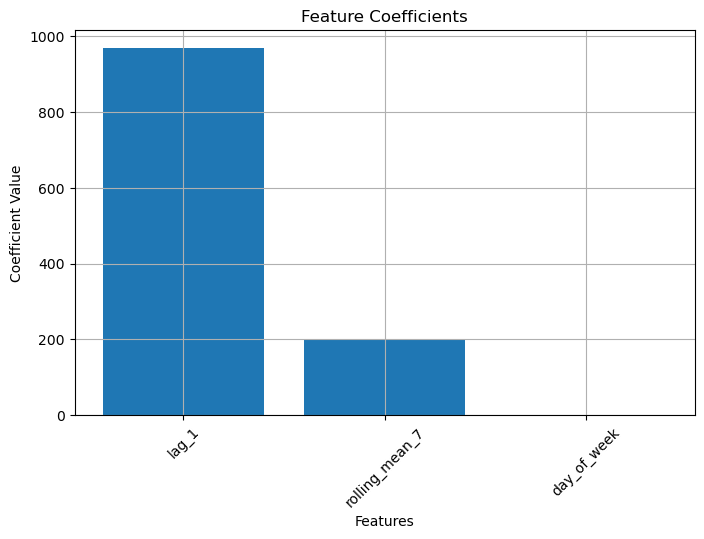

In [93]:
# Feature importance (coefficients)
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': lr_model.coef_
}).sort_values(by='Coefficient', ascending=False)

# Display feature importance
print(coefficients)

# Plot feature coefficients
plt.figure(figsize=(8, 5))
plt.bar(coefficients['Feature'], coefficients['Coefficient'])
plt.title("Feature Coefficients")
plt.xlabel("Features")
plt.ylabel("Coefficient Value")
plt.xticks(rotation=45)
plt.grid()
plt.show()